In [1]:
## testing STA/LTA algorithm for one recording from the first line of sensors

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import obspy
import scipy

In [2]:
# loading processed data
data = np.load("/Users/annamaria/PhD/work/STA_LTA/exaple_data.npy")

In [3]:
# defining sampling frequency, time step and time vector

n = len(data) # number of data points
fs = 250 # sampling frequency
dt = 1/fs # time step
nb_sens = 20 # number of sensors
nfft = 8192*2 # number of points in frequency


t = np.arange(0,n*dt,dt)
nt = len(t)
print(nt)

45056


<Figure size 432x288 with 0 Axes>

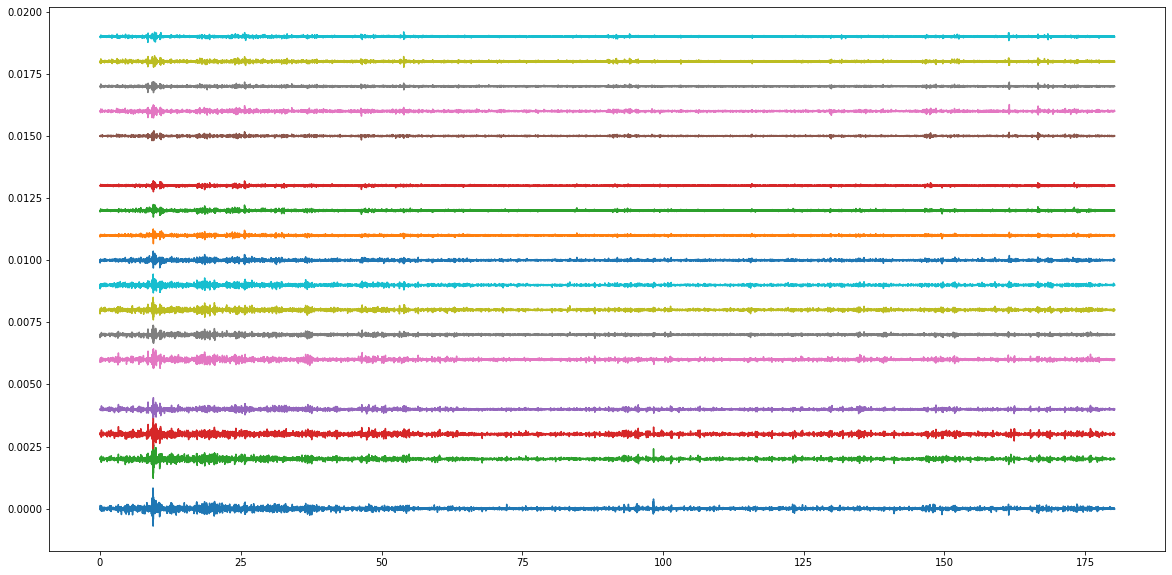

In [4]:
# plotting the signal

plt.figure()
plt.figure(figsize=(20,10))
for column in range(nb_sens):
    plt.plot(t,data[:,column]+0.001*column) 

In [17]:
# Setting STA/LTA parameters

LTA = int(10/dt)
STA = int(1/dt)
trig = 2
PEM = int(5/dt)

# Creating empty vectors for STA and LTA
STA1 = np.linspace(0,0,nt)
LTA1 = np.linspace(0,0,nt)
ratio1 = np.linspace(0,0,nt)
LTA

2500

In [18]:
# Simple case of detecting the treshold

# loop for STA
for k in range(len(data[:,0])-STA):
    STA1[k] = np.mean(abs(data[k:(STA+k),0]))
# loop for LTA
for k in range(len(data[:,0])-LTA):
    LTA1[k] = np.mean(abs(data[k:(LTA+k),0]))
# loop for ratio
for k in range(len(data[:,0])-LTA):
    ratio1[k+LTA] = STA1[k+LTA-STA] / LTA1[k]

Text(0.5, 1.0, 'The original function (F1)')

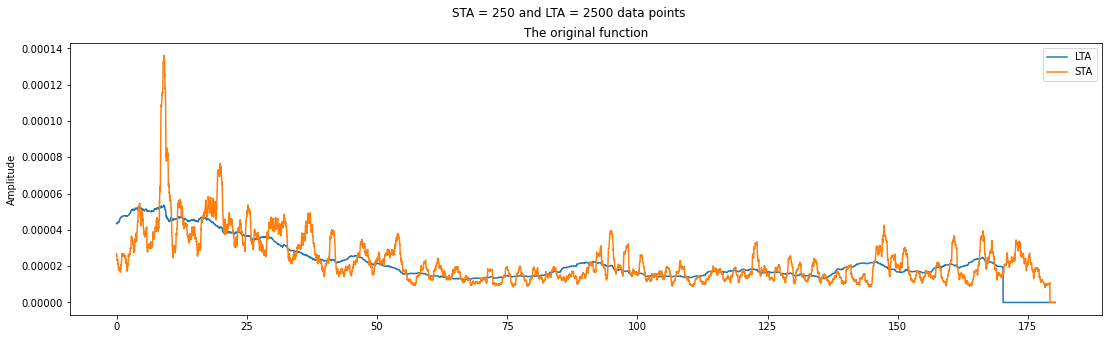

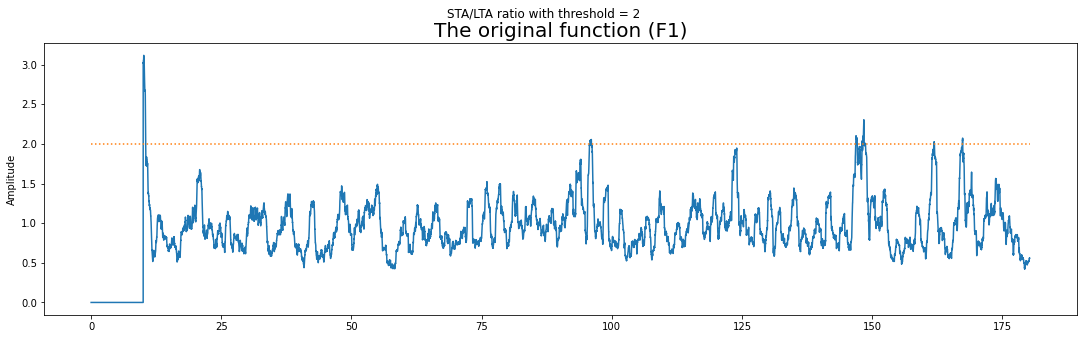

In [19]:
# Plotting the STA, LTA and ratios

# STA LTA plots
plt.figure(figsize=(18.5, 5))
plt.suptitle("STA = {} and LTA = {} data points".format(STA,LTA))

plt.plot(t,LTA1,label='LTA')
plt.plot(t,STA1,label='STA')
plt.ylabel('Amplitude')
plt.legend()
plt.title('The original function')



# ratio plots
plt.figure(figsize=(18.5, 5))
plt.suptitle("STA/LTA ratio with threshold = {}".format(trig))

plt.plot(t,ratio1, label='ratio')
plt.plot([t[0],t[-1]],[trig,trig],linestyle='dotted',label='treshold')
plt.ylabel('Amplitude')
plt.title('The original function (F1)', fontsize=20)



In [20]:
# Stationary and transient separation
numbers1 = np.zeros(len(ratio1))

aa = 0
for kk in range(len(ratio1)):
    if ratio1[kk] >= trig and ratio1[kk-1] <= trig:
        numb = kk
        numbers1[kk] = numb
        aa += 1 

In [21]:
trans2 = np.linspace(0,0,nt)
stat2 = np.linspace(0,0,nt)


# data[kk,0] a loop for extracting the whole vecotr data for stationary and transient parts of the signal

i = 0
kk = 0

while kk <= nt-1:
    #print(kk)
    if kk + PEM <= nt-1:
        # case when there is only one peak
        if len(numbers1) == 1:
            if ratio1[kk+PEM] >= trig and ratio1[kk+PEM-1] <= trig:
                while kk < numbers1[i]+PEM:
                    trans2[kk] = data[kk,0]
                    stat2[kk] = 0
                    kk = kk + 1
            else:
                stat2[kk] = data[kk,0]
                trans2[kk] = 0
                kk = kk + 1
        elif i > len(numbers1):
            while kk <= nt:
                stat2[kk] = data[kk,0]
                trans2[kk] = 0
                kk = kk + 1
        else:
            if ratio1[kk+PEM] >= trig and ratio1[kk+PEM-1] <= trig:
                while kk < numbers1[i]+PEM:
                    trans2[kk] = data[kk,0]
                    stat2[kk] = 0
                    kk = kk + 1 
                # dopoki numbers(i+1)+pem < kk 
                if i+1 <= len(numbers1):
                    if numbers1[i+1]-PEM <= kk:
                        while numbers1[i]-PEM <= kk:
                            # dopoki
                            while kk < numbers1[i]+PEM:
                                trans2[kk] = data[kk,0]
                                stat2[kk] = 0
                                kk = kk + 1
                            i = i + 1
                            #jesli tak, to do konca numbers(i+1)+Pem - transient
                            if i+1 > len(numbers1):
                                break
                    else:
                        i = i + 1
                        # jesli nie, idziemy dalej normlanie
                else:
                    stat2[kk] = data[kk,0]
                    trans2[kk] = 0
                    kk = kk + 1
            else:
                stat2[kk] = data[kk,0]
                trans2[kk] = 0
                kk = kk + 1
    else:
        stat2[kk] = data[kk,0]
        trans2[kk] = 0
        kk = kk + 1    

Text(0.5, 1.0, 'Function with the transient (F2)')

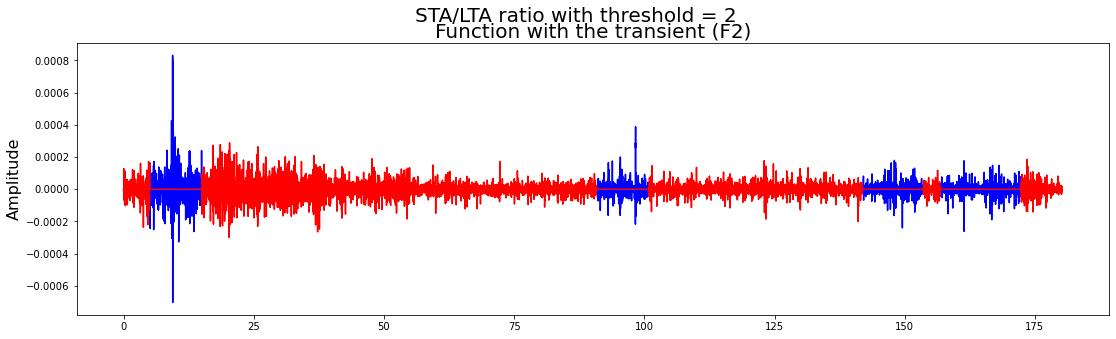

In [22]:
# plotting the transient and stationary parts

plt.figure(figsize=(18.5, 5))
plt.suptitle("STA/LTA ratio with threshold = {}".format(trig), fontsize=20)

plt.plot(t,trans2,'b', label='transient')
plt.plot(t,stat2,'r', label='stationary')
plt.ylabel('Amplitude', fontsize=16)
plt.title('Function with the transient (F2)', fontsize=20)

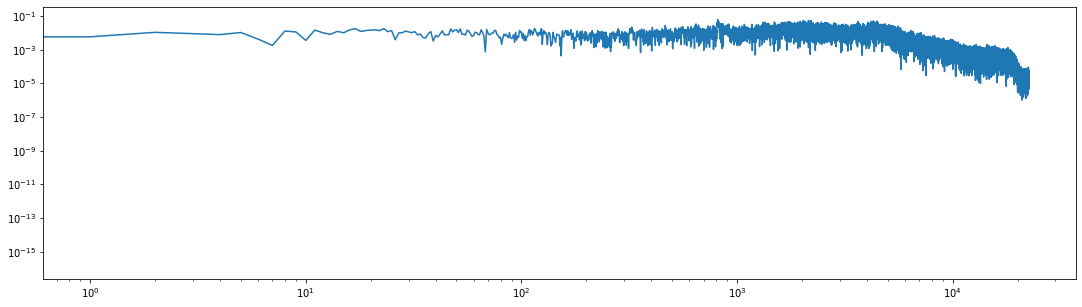

In [32]:
from scipy.fft import fft, ifft
hhh = fft(data[:,0])

half = len(hhh)//2


plt.figure(figsize=(18.5, 5))
plt.loglog(abs(hhh[0:half]))


/Users/annamaria/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


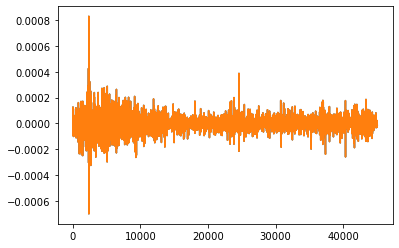

In [36]:
xxxx = ifft(hhh)

plt.plot(xxxx)
plt.plot(data[:,0])

In [53]:
from scipy import signal
N = 4
Wn = [4.5,20]
btype = 'band'
sos = signal.butter(N, Wn, btype, fs=250, output='sos')

filtered = signal.sosfilt(sos, data[:,0])


jjj = fft(filtered)

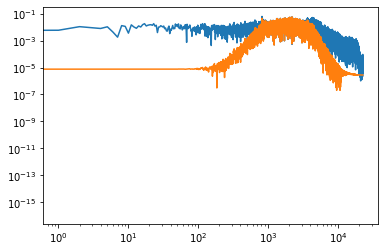

In [55]:
plt.loglog(abs(hhh[0:half]))
plt.loglog(abs(jjj[0:half]))